<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-01 22:55:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  39.9MB/s    in 0.9s    

2024-09-01 22:55:15 (39.9 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Create a cursor object
cursor = conn.cursor()

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [3]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [4]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [5]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


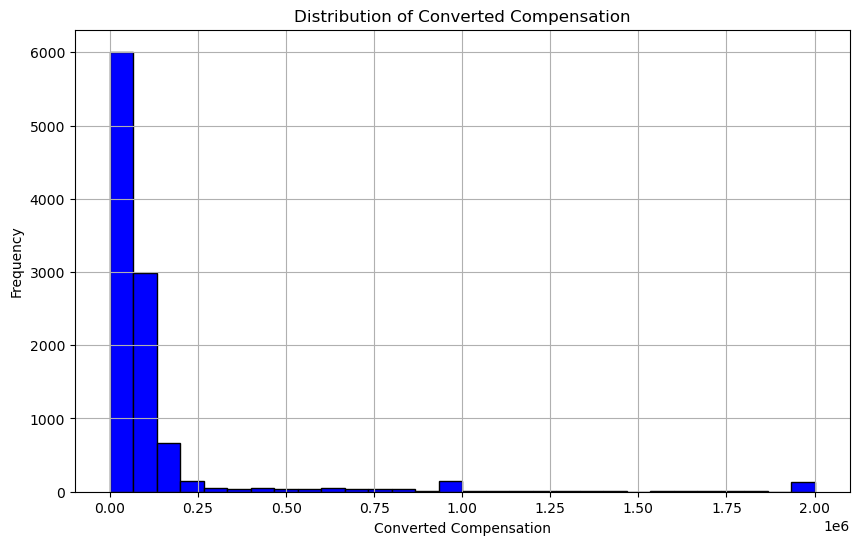

In [6]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to select the ConvertedComp column from the "master" table
query = "SELECT ConvertedComp FROM master WHERE ConvertedComp IS NOT NULL;"
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot a histogram of ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(data['ConvertedComp'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Box Plots


Plot a box plot of `Age.`


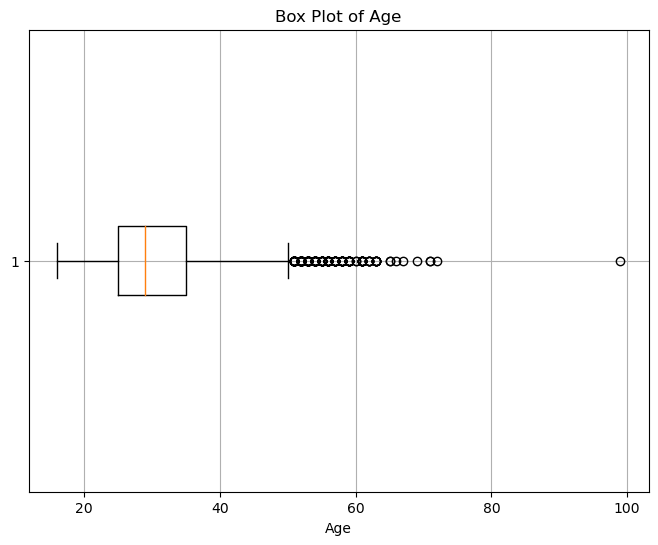

In [7]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to select the Age column from the "master" table
query = "SELECT Age FROM master WHERE Age IS NOT NULL;"
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot a box plot of Age
plt.figure(figsize=(8, 6))
plt.boxplot(data['Age'].dropna(), vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


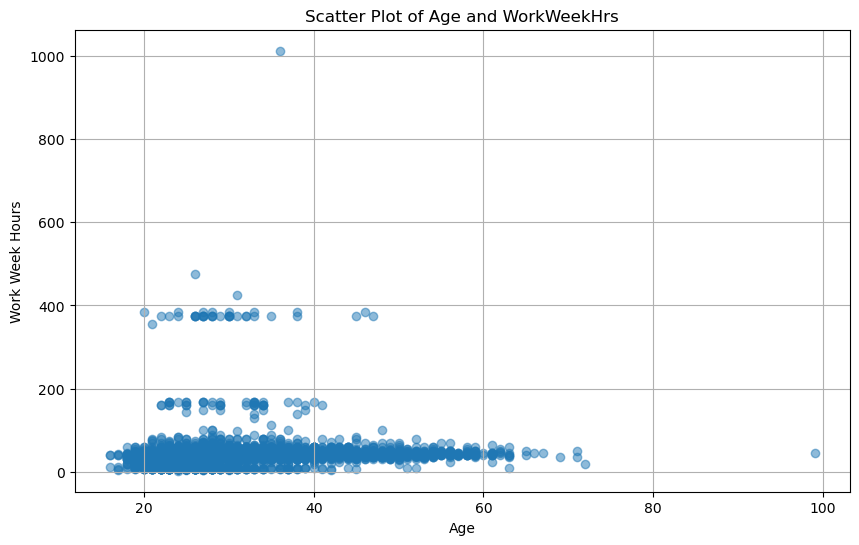

In [8]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get Age and WorkWeekHrs columns
query = "SELECT Age, WorkWeekHrs FROM master WHERE Age IS NOT NULL AND WorkWeekHrs IS NOT NULL;"
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('Work Week Hours')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


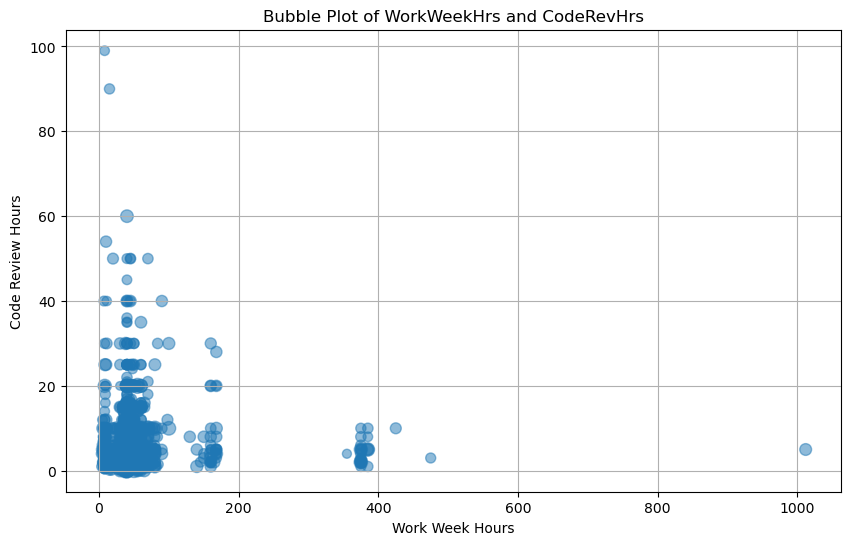

In [9]:
# your code goes here
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get WorkWeekHrs, CodeRevHrs, and Age columns
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master WHERE WorkWeekHrs IS NOT NULL AND CodeRevHrs IS NOT NULL AND Age IS NOT NULL;"
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(data['WorkWeekHrs'], data['CodeRevHrs'], s=data['Age']*2, alpha=0.5)
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('Work Week Hours')
plt.ylabel('Code Review Hours')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


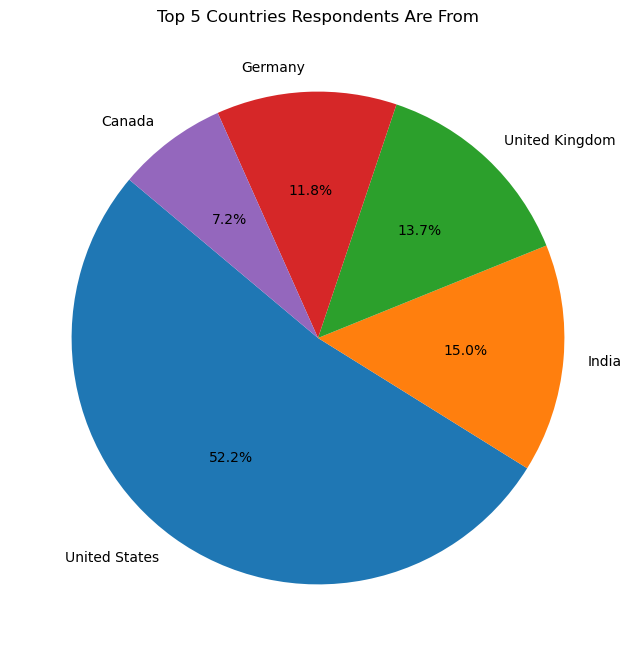

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get the top 5 countries respondents are from
query = """
SELECT Country, COUNT(*) as count
FROM master
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY count DESC
LIMIT 5;
"""
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data['count'], labels=data['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Countries Respondents Are From')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


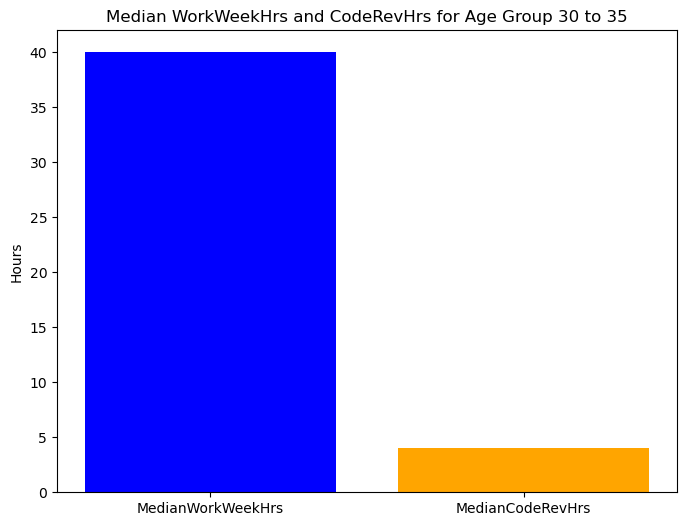

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get WorkWeekHrs and CodeRevHrs for age group 30 to 35
query = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
AND WorkWeekHrs IS NOT NULL
AND CodeRevHrs IS NOT NULL;
"""
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Calculate the median values using Pandas
median_work_week_hrs = data['WorkWeekHrs'].median()
median_code_rev_hrs = data['CodeRevHrs'].median()

# Prepare data for stacked bar chart
categories = ['MedianWorkWeekHrs', 'MedianCodeRevHrs']
values = [median_work_week_hrs, median_code_rev_hrs]

# Create a stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'orange'])
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


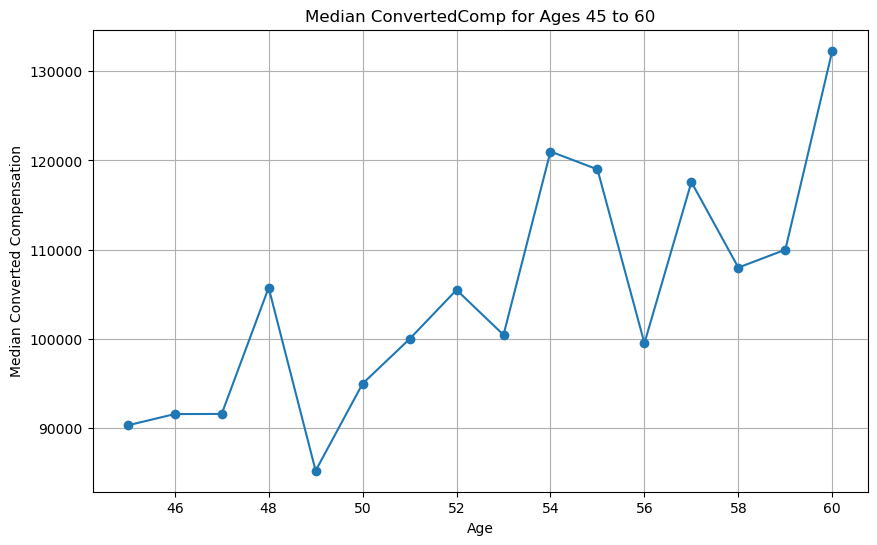

In [17]:
# your code goes here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get ConvertedComp and Age for ages 45 to 60
query = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
AND ConvertedComp IS NOT NULL;
"""
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Calculate the median ConvertedComp for each age
median_converted_comp = data.groupby('Age')['ConvertedComp'].median()

# Plot the median ConvertedComp as a line chart
plt.figure(figsize=(10, 6))
plt.plot(median_converted_comp.index, median_converted_comp.values, marker='o')
plt.title('Median ConvertedComp for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


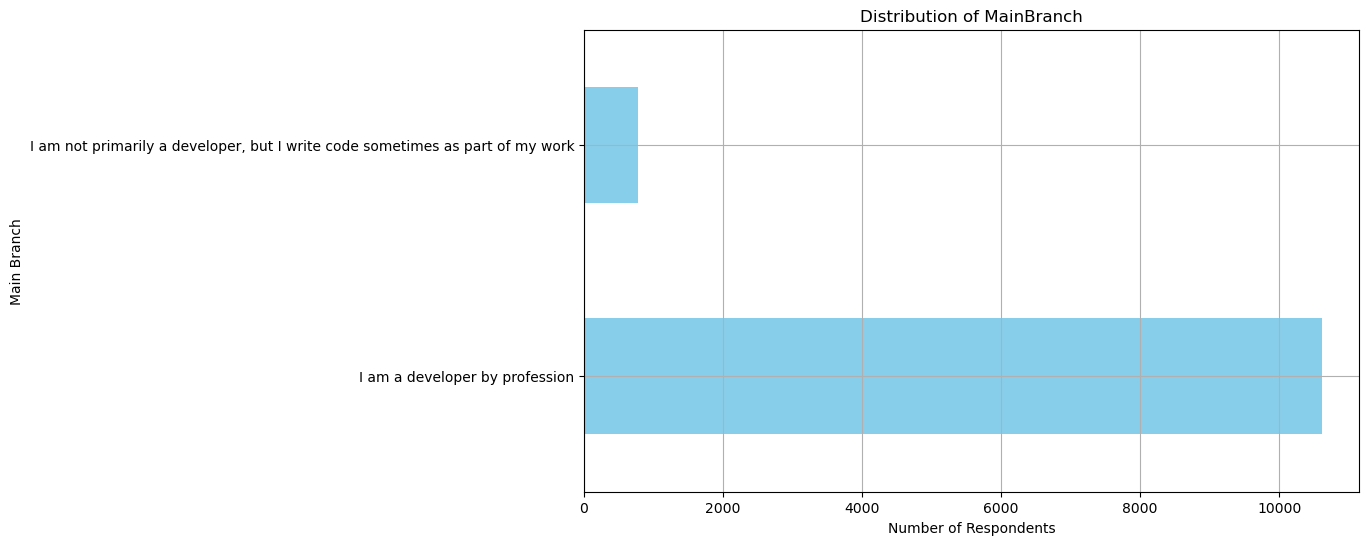

In [18]:
# your code goes here

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query to get the MainBranch column data
query = """
SELECT MainBranch
FROM master
WHERE MainBranch IS NOT NULL;
"""
data = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Count the occurrences of each category in the MainBranch column
main_branch_counts = data['MainBranch'].value_counts()

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
main_branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(True)
plt.show()

Close the database connection.


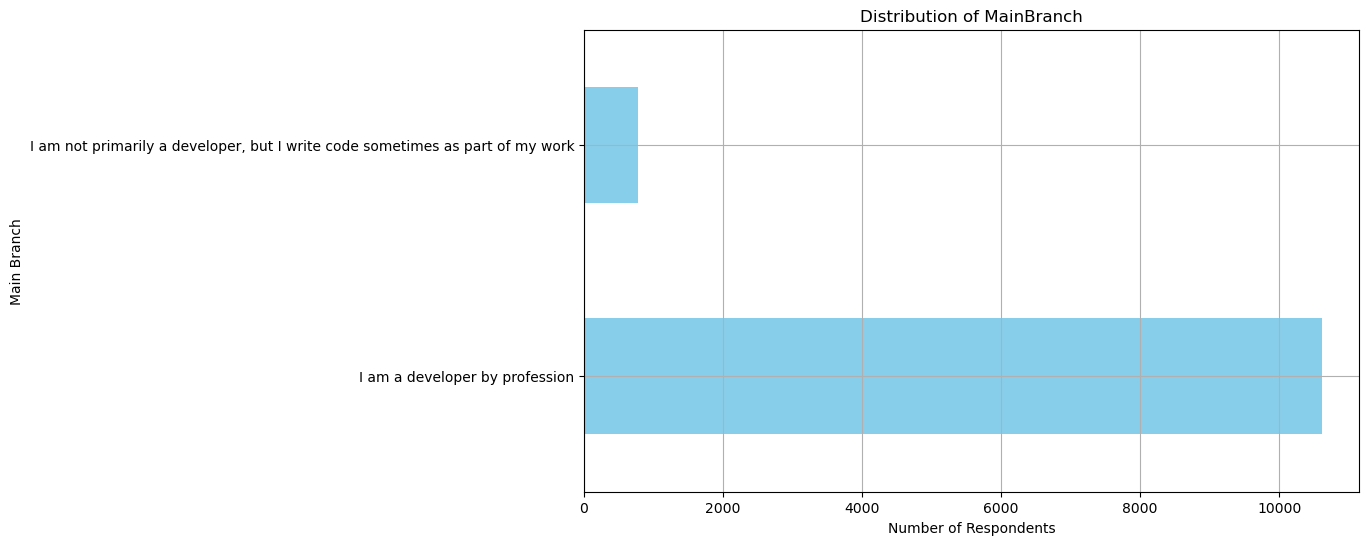

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

try:
    # Query to get the MainBranch column data
    query = """
    SELECT MainBranch
    FROM master
    WHERE MainBranch IS NOT NULL;
    """
    data = pd.read_sql_query(query, conn)

    # Count the occurrences of each category in the MainBranch column
    main_branch_counts = data['MainBranch'].value_counts()

    # Plot a horizontal bar chart
    plt.figure(figsize=(10, 6))
    main_branch_counts.plot(kind='barh', color='skyblue')
    plt.title('Distribution of MainBranch')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Main Branch')
    plt.grid(True)
    plt.show()

finally:
    # Ensure the database connection is closed
    conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
